In [60]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '349bf6b0-7644-4cad-95ad-ee7606c8bc87',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [61]:
type(data)

dict

In [62]:
import pandas as pd

pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)

In [63]:
df = pd.json_normalize(data['data'])

df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11835,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19794440.00000,19794440.00000,False,NaN,1,NaN,NaN,None,2024-12-11T15:56:00.000Z,100439.71083,95575243882.77660,-14.76240,1.22022,4.66437,4.85072,19.38734,59.21479,74.70066,1988147829598.31030,55.43000,2109233927383.87988,None,2024-12-11T15:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-11 22:57:54.801201
1,1027,Ethereum,ETH,ethereum,9662,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120444873.49586,120444873.49586,True,NaN,2,NaN,NaN,None,2024-12-11T15:57:00.000Z,3790.52710,46677467528.81184,-29.40550,0.64076,5.93495,-0.81604,16.97556,53.51036,63.22397,456549556522.86761,12.72870,456549556522.87000,None,2024-12-11T15:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-11 22:57:54.801201
2,52,XRP,XRP,xrp,1474,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,57117231849.00000,99986904872.00000,False,NaN,3,NaN,NaN,None,2024-12-11T15:57:00.000Z,2.45015,24357828962.21555,11.54050,1.02116,18.95442,-2.16000,314.79161,352.56271,339.74815,139945904487.28162,3.90170,245015208120.12000,None,2024-12-11T15:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-11 22:57:54.801201
3,825,Tether USDt,USDT,tether,107900,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,138618977175.67438,141193635647.97623,True,NaN,4,NaN,NaN,None,2024-12-11T15:56:00.000Z,1.00073,220796073586.28873,-23.36260,-0.00693,0.02105,-0.04508,-0.02749,0.09934,0.08635,138719547807.06302,3.86350,141296074241.70001,None,2024-12-11T15:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-11 22:57:54.801201
4,5426,Solana,SOL,solana,808,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,476384688.63552,589978284.89589,True,NaN,5,NaN,NaN,None,2024-12-11T15:57:00.000Z,229.06873,7289579425.72039,-27.91540,0.80026,9.92644,-1.80118,4.67102,57.15639,71.43383,109124834049.46384,3.04100,135145574507.14000,None,2024-12-11T15:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-11 22:57:54.801201
5,1839,BNB,BNB,bnb,2305,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144008692.16000,144008692.16000,False,NaN,6,NaN,NaN,None,2024-12-11T15:57:00.000Z,696.45870,2557979778.33415,-25.49260,0.68311,5.17642,-7.72983,11.29000,21.02660,30.07543,100296106791.23183,2.79500,100296106791.23000,None,2024-12-11T15:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-11 22:57:54.801201
6,74,Dogecoin,DOGE,dogecoin,1125,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147156986383.70520,147156986383.70520,True,NaN,7,NaN,NaN,None,2024-12-11T15:57:00.000Z,0.41383,8913742103.46893,-28.90690,1.35695,9.02889,0.43316,33.48381,272.18386,311.02808,60898444220.38840,1.69610,60898444220.39000,None,2024-12-11T15:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-11 22:57:54.801201
7,3408,USDC,USDC,usd-coin,23737,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,40845919367.09719,40845919367.09719,False,NaN,8,NaN,NaN,None,2024-12-11T15:57:00.000Z,0.99999,13977439740.96004,-23.83120,-0.01985,0.01157,0.00065,0.00389,0.00125,0.00651,40845460009.71636,1.13780,40845460009.72000,None,2024-12-11T15:57:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218

In [64]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '349bf6b0-7644-4cad-95ad-ee7606c8bc87',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])

    df2['timestamp'] = pd.to_datetime('now')
    
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])
    
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df
    
    
    #if not os.path.isfile(r'C:\Users\ASUS\Documents\BELAJAR DATA ANALIS FROM YT\API_TEST\API.csv'):
        #df.to_csv(r'C:\Users\ASUS\Documents\BELAJAR DATA ANALIS FROM YT\API_TEST\API.csv', header = 'column_names')
    #else:
        #df.to_csv(r'C:\Users\ASUS\Documents\BELAJAR DATA ANALIS FROM YT\API_TEST\API.csv', mode='a', header=False)
    

In [65]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API Runner Completed")
    sleep(60)
exit()

API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed


KeyboardInterrupt: 

In [20]:
df63 = pd.read_csv(r'C:\Users\ASUS\Documents\BELAJAR DATA ANALIS FROM YT\API_TEST\API.csv')
df63

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11835,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.979444e+07,1.979444e+07,False,NaN,1,NaN,NaN,NaN,2024-12-11T14:48:00.000Z,99294.410107,9.340482e+10,-18.4252,0.658359,1.139943,3.238145,20.627400,56.769182,71.918399,1.965477e+12,55.6571,2.085183e+12,NaN,2024-12-11T14:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-11 21:50:19.203910
1,1,1027,Ethereum,ETH,ethereum,9661,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204449e+08,1.204449e+08,True,NaN,2,NaN,NaN,NaN,2024-12-11T14:48:00.000Z,3756.695754,4.838437e+10,-26.5460,0.431428,0.994514,-0.296776,18.562605,51.847080,60.766741,4.524747e+11,12.7986,4.524747e+11,NaN,2024-12-11T14:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-11 21:50:19.203910
2,2,825,Tether USDt,USDT,tether,107894,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.386190e+11,1.411936e+11,True,NaN,3,NaN,NaN,NaN,2024-12-11T14:48:00.000Z,1.000614,2.223089e+11,-22.8744,0.027848,0.016940,0.008840,-0.047678,0.080758,0.074493,1.387041e+11,3.9253,1.412804e+11,NaN,2024-12-11T14:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-11 21:50:19.203910
3,3,52,XRP,XRP,xrp,1474,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.711723e+10,9.998690e+10,False,NaN,4,NaN,NaN,NaN,2024-12-11T14:48:00.000Z,2.387691,2.424455e+10,12.3796,0.117974,8.626634,-7.957229,310.889714,340.563143,323.146205,1.363783e+11,3.8576,2.387691e+11,NaN,2024-12-11T14:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-11 21:50:19.203910
4,4,5426,Solana,SOL,solana,808,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.763853e+08,5.899786e+08,True,NaN,5,NaN,NaN,NaN,2024-12-11T14:48:00.000Z,226.637938,7.544378e+09,-25.8621,-0.022990,4.128055,-2.679674,4.199947,54.236982,67.922003,1.079670e+11,3.0558,1.337115e+11,NaN,2024-12-11T14:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-11 21:50:19.203910
5,5,1839,BNB,BNB,bnb,2305,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.440087e+08,1.440087e+08,False,NaN,6,NaN,NaN,NaN,2024-12-11T14:48:00.000Z,689.002816,2.613901e+09,-23.5400,-0.588204,-0.252966,-10.933361,11.362917,19.304588,26.342271,9.922240e+10,2.8083,9.922240e+10,NaN,2024-12-11T14:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-11 21:50:19.203910
6,6,74,Dogecoin,DOGE,dogecoin,1125,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.471567e+11,1.471567e+11,True,NaN,7,NaN,NaN,NaN,2024-12-11T14:48:00.000Z,0.405571,9.219355e+09,-25.2447,-0.308475,0.411925,-2.167411,39.693569,262.652690,299.009292,5.968242e+10,1.6890,5.968242e+10,NaN,2024-12-11T14:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-11 21:50:19.203910
7,7,3408,USDC,USDC,usd-coin,23734,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.088021e+10,4.088021e+10,False,NaN,8,NaN,NaN,NaN,2024-12-11T14:48:00.000Z,1.000171,1.436204e+10,-20.9292,0.031048,0.012816,0.014834,0.006262,0.018221,0.028820,4.088722e+10,1.1579,4.088722e+10,NaN,2024-12-11T14:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-12-11 21:50:19.203910
8,8,2010,Cardano,ADA,cardano,1388,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart.

In [66]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11835,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19794440.00000,19794440.00000,False,NaN,1,NaN,NaN,None,2024-12-11T15:56:00.000Z,100439.71083,95575243882.77660,-14.76240,1.22022,4.66437,4.85072,19.38734,59.21479,74.70066,1988147829598.31030,55.43000,2109233927383.87988,None,2024-12-11T15:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-11 22:57:54.801201
1,1027,Ethereum,ETH,ethereum,9662,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120444873.49586,120444873.49586,True,NaN,2,NaN,NaN,None,2024-12-11T15:57:00.000Z,3790.52710,46677467528.81184,-29.40550,0.64076,5.93495,-0.81604,16.97556,53.51036,63.22397,456549556522.86761,12.72870,456549556522.87000,None,2024-12-11T15:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-11 22:57:54.801201
2,52,XRP,XRP,xrp,1474,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,57117231849.00000,99986904872.00000,False,NaN,3,NaN,NaN,None,2024-12-11T15:57:00.000Z,2.45015,24357828962.21555,11.54050,1.02116,18.95442,-2.16000,314.79161,352.56271,339.74815,139945904487.28162,3.90170,245015208120.12000,None,2024-12-11T15:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-11 22:57:54.801201
3,825,Tether USDt,USDT,tether,107900,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,138618977175.67438,141193635647.97623,True,NaN,4,NaN,NaN,None,2024-12-11T15:56:00.000Z,1.00073,220796073586.28873,-23.36260,-0.00693,0.02105,-0.04508,-0.02749,0.09934,0.08635,138719547807.06302,3.86350,141296074241.70001,None,2024-12-11T15:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-11 22:57:54.801201
4,5426,Solana,SOL,solana,808,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,476384688.63552,589978284.89589,True,NaN,5,NaN,NaN,None,2024-12-11T15:57:00.000Z,229.06873,7289579425.72039,-27.91540,0.80026,9.92644,-1.80118,4.67102,57.15639,71.43383,109124834049.46384,3.04100,135145574507.14000,None,2024-12-11T15:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-11 22:57:54.801201
5,1839,BNB,BNB,bnb,2305,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144008692.16000,144008692.16000,False,NaN,6,NaN,NaN,None,2024-12-11T15:57:00.000Z,696.45870,2557979778.33415,-25.49260,0.68311,5.17642,-7.72983,11.29000,21.02660,30.07543,100296106791.23183,2.79500,100296106791.23000,None,2024-12-11T15:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-11 22:57:54.801201
6,74,Dogecoin,DOGE,dogecoin,1125,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147156986383.70520,147156986383.70520,True,NaN,7,NaN,NaN,None,2024-12-11T15:57:00.000Z,0.41383,8913742103.46893,-28.90690,1.35695,9.02889,0.43316,33.48381,272.18386,311.02808,60898444220.38840,1.69610,60898444220.39000,None,2024-12-11T15:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-11 22:57:54.801201
7,3408,USDC,USDC,usd-coin,23737,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,40845919367.09719,40845919367.09719,False,NaN,8,NaN,NaN,None,2024-12-11T15:57:00.000Z,0.99999,13977439740.96004,-23.83120,-0.01985,0.01157,0.00065,0.00389,0.00125,0.00651,40845460009.71636,1.13780,40845460009.72000,None,2024-12-11T15:57:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218

In [67]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [68]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11835,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19794440.00000,19794440.00000,False,NaN,1,NaN,NaN,None,2024-12-11T15:56:00.000Z,100439.71083,95575243882.77660,-14.76240,1.22022,4.66437,4.85072,19.38734,59.21479,74.70066,1988147829598.31030,55.43000,2109233927383.87988,None,2024-12-11T15:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-11 22:57:54.801201
1,1027,Ethereum,ETH,ethereum,9662,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120444873.49586,120444873.49586,True,NaN,2,NaN,NaN,None,2024-12-11T15:57:00.000Z,3790.52710,46677467528.81184,-29.40550,0.64076,5.93495,-0.81604,16.97556,53.51036,63.22397,456549556522.86761,12.72870,456549556522.87000,None,2024-12-11T15:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-11 22:57:54.801201
2,52,XRP,XRP,xrp,1474,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,57117231849.00000,99986904872.00000,False,NaN,3,NaN,NaN,None,2024-12-11T15:57:00.000Z,2.45015,24357828962.21555,11.54050,1.02116,18.95442,-2.16000,314.79161,352.56271,339.74815,139945904487.28162,3.90170,245015208120.12000,None,2024-12-11T15:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-11 22:57:54.801201
3,825,Tether USDt,USDT,tether,107900,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,138618977175.67438,141193635647.97623,True,NaN,4,NaN,NaN,None,2024-12-11T15:56:00.000Z,1.00073,220796073586.28873,-23.36260,-0.00693,0.02105,-0.04508,-0.02749,0.09934,0.08635,138719547807.06302,3.86350,141296074241.70001,None,2024-12-11T15:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-11 22:57:54.801201
4,5426,Solana,SOL,solana,808,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,476384688.63552,589978284.89589,True,NaN,5,NaN,NaN,None,2024-12-11T15:57:00.000Z,229.06873,7289579425.72039,-27.91540,0.80026,9.92644,-1.80118,4.67102,57.15639,71.43383,109124834049.46384,3.04100,135145574507.14000,None,2024-12-11T15:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-11 22:57:54.801201
5,1839,BNB,BNB,bnb,2305,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144008692.16000,144008692.16000,False,NaN,6,NaN,NaN,None,2024-12-11T15:57:00.000Z,696.45870,2557979778.33415,-25.49260,0.68311,5.17642,-7.72983,11.29000,21.02660,30.07543,100296106791.23183,2.79500,100296106791.23000,None,2024-12-11T15:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-11 22:57:54.801201
6,74,Dogecoin,DOGE,dogecoin,1125,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147156986383.70520,147156986383.70520,True,NaN,7,NaN,NaN,None,2024-12-11T15:57:00.000Z,0.41383,8913742103.46893,-28.90690,1.35695,9.02889,0.43316,33.48381,272.18386,311.02808,60898444220.38840,1.69610,60898444220.39000,None,2024-12-11T15:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-11 22:57:54.801201
7,3408,USDC,USDC,usd-coin,23737,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,40845919367.09719,40845919367.09719,False,NaN,8,NaN,NaN,None,2024-12-11T15:57:00.000Z,0.99999,13977439740.96004,-23.83120,-0.01985,0.01157,0.00065,0.00389,0.00125,0.00651,40845460009.71636,1.13780,40845460009.72000,None,2024-12-11T15:57:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218

In [69]:
df4= df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d', 'quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,1.05733,4.73469,4.82333,19.37503,59.15424,74.68018
Ethereum,0.52104,6.06192,-0.89840,16.92616,53.37587,63.13777
XRP,1.11670,19.02503,-2.26563,314.65576,352.39186,339.47301
Tether USDt,-0.01402,0.01719,-0.04576,-0.02874,0.09146,0.08183
Solana,0.72641,9.95865,-1.97695,4.51740,56.91076,71.30146
BNB,0.62202,5.25164,-7.85727,11.16590,20.90632,30.01003
Dogecoin,1.31092,9.09086,0.24726,33.30036,271.67338,310.61335
USDC,-0.01148,0.00489,0.00080,0.03029,0.00595,0.00988
Cardano,0.17146,14.08782,-8.45842,81.28501,207.94101,206.41437


In [70]:
df5 = df4.stack()
df5

name                                     
Bitcoin      quote.USD.percent_change_1h      1.05733
             quote.USD.percent_change_24h     4.73469
             quote.USD.percent_change_7d      4.82333
             quote.USD.percent_change_30d    19.37503
             quote.USD.percent_change_60d    59.15424
             quote.USD.percent_change_90d    74.68018
Ethereum     quote.USD.percent_change_1h      0.52104
             quote.USD.percent_change_24h     6.06192
             quote.USD.percent_change_7d     -0.89840
             quote.USD.percent_change_30d    16.92616
             quote.USD.percent_change_60d    53.37587
             quote.USD.percent_change_90d    63.13777
XRP          quote.USD.percent_change_1h      1.11670
             quote.USD.percent_change_24h    19.02503
             quote.USD.percent_change_7d     -2.26563
             quote.USD.percent_change_30d   314.65576
             quote.USD.percent_change_60d   352.39186
             quote.USD.percent_change_90

In [71]:
type(df5)

pandas.core.series.Series

In [72]:
df6 = df5.to_frame(name='values')
df6

values
name                                              
Bitcoin     quote.USD.percent_change_1h    1.05733
            quote.USD.percent_change_24h   4.73469
            quote.USD.percent_change_7d    4.82333
            quote.USD.percent_change_30d  19.37503
            quote.USD.percent_change_60d  59.15424
            quote.USD.percent_change_90d  74.68018
Ethereum    quote.USD.percent_change_1h    0.52104
            quote.USD.percent_change_24h   6.06192
            quote.USD.percent_change_7d   -0.89840
            quote.USD.percent_change_30d  16.92616
            quote.USD.percent_change_60d  53.37587
            quote.USD.percent_change_90d  63.13777
XRP         quote.USD.percent_change_1h    1.11670
            quote.USD.percent_change_24h  19.02503
            quote.USD.percent_change_7d   -2.26563
            quote.USD.percent_change_30d 314.65576
            quote.USD.percent_change_60d 352.39186
            quote.USD.percent_change_90d 339.47301
Tether USDt quote.USD.percent_change_1h   -0.01402
            quote.USD.percent_change_24h   0.01719
            quote.USD.percent_change_7d   -0.04576
            quote.USD.percent_change_30d  -0.02874
            quote.USD.percent_change_60d   0.09146
            quote.USD.percent_change_90d   0.08183
Solana      quote.USD.percent_change_1h    0.72641
            quote.USD.percent_change_24h   9.95865
            quote.USD.percent_change_7d   -1.97695
            quote.USD.percent_change_30d   4.51740
            quote.USD.percent_change_60d  56.91076
            quote.USD.percent_change_90d  71.30146
BNB         quote.USD.percent_change_1h    0.62202
            quote.USD.percent_change_24h   5.25164
            quote.USD.percent_change_7d   -7.85727
            quote.USD.percent_change_30d  11.16590
            quote.USD.percent_change_60d  20.90632
            quote.USD.percent_change_90d  30.01003
Dogecoin    quote.USD.percent_change_1h    1.31092
            quote.USD.percent_change_24h   9.09086
            quote.USD.percent_change_7d    0.24726
            quote.USD.percent_change_30d  33.30036
            quote.USD.percent_change_60d 271.67338
            quote.USD.percent_change_90d 310.61335
USDC        quote.USD.percent_change_1h   -0.01148
            quote.USD.percent_change_24h   0.00489
            quote.USD.percent_change_7d    0.00080
            quote.USD.percent_change_30d   0.03029
            quote.USD.percent_change_60d   0.00595
            quote.USD.percent_change_90d   0.00988
Cardano     quote.USD.percent_change_1h    0.17146
            quote.USD.percent_change_24h  14.08782
            quote.USD.percent_change_7d   -8.45842
            quote.USD.percent_change_30d  81.28501
            quote.USD.percent_change_60d 207.94101
            quote.USD.percent_change_90d 206.41437
TRON        quote.USD.percent_change_1h    1.62148
            quote.USD.percent_change_24h   9.92111
            quote.USD.percent_change_7d  -19.08094
            quote.USD.percent_change_30d  71.75674
            quote.USD.percent_change_60d  74.56530
            quote.USD.percent_change_90d  86.87650
Avalanche   quote.USD.percent_change_1h    0.89859
            quote.USD.percent_change_24h  12.18449
            quote.USD.percent_change_7d  -13.69559
            quote.USD.percent_change_30d  47.20650
            quote.USD.percent_change_60d  64.72916
            quote.USD.percent_change_90d 103.78909
Shiba Inu   quote.USD.percent_change_1h    1.15856
            quote.USD.percent_change_24h  13.77315
            quote.USD.percent_change_7d   -4.68820
            quote.USD.percent_change_30d   3.07574
            quote.USD.percent_change_60d  61.30783
            quote.USD.percent_change_90d 117.78408
Toncoin     quote.USD.percent_change_1h    0.68448
            quote.USD.percent_change_24h  11.98450
            quote.USD.percent_change_7d  -10.90496
            quote.USD.percent_change_30d  16.94160
            quote.USD.percent_change_60d  19.00978
            quo

In [73]:
df6.count()

values    90
dtype: int64

In [74]:
index = pd.Index(range(90))
df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,1.05733
1,Bitcoin,quote.USD.percent_change_24h,4.73469
2,Bitcoin,quote.USD.percent_change_7d,4.82333
3,Bitcoin,quote.USD.percent_change_30d,19.37503
4,Bitcoin,quote.USD.percent_change_60d,59.15424
5,Bitcoin,quote.USD.percent_change_90d,74.68018
6,Ethereum,quote.USD.percent_change_1h,0.52104
7,Ethereum,quote.USD.percent_change_24h,6.06192
8,Ethereum,quote.USD.percent_change_7d,-0.89840
9,Ethereum,quote.USD.percent_change_30d,16.92616


In [75]:
df8 = df7.rename(columns={'level_1': 'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,1.05733
1,Bitcoin,quote.USD.percent_change_24h,4.73469
2,Bitcoin,quote.USD.percent_change_7d,4.82333
3,Bitcoin,quote.USD.percent_change_30d,19.37503
4,Bitcoin,quote.USD.percent_change_60d,59.15424
5,Bitcoin,quote.USD.percent_change_90d,74.68018
6,Ethereum,quote.USD.percent_change_1h,0.52104
7,Ethereum,quote.USD.percent_change_24h,6.06192
8,Ethereum,quote.USD.percent_change_7d,-0.89840
9,Ethereum,quote.USD.percent_change_30d,16.92616


In [76]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df8

,name,percent_change,values
0,Bitcoin,1h,1.05733
1,Bitcoin,24h,4.73469
2,Bitcoin,7d,4.82333
3,Bitcoin,30d,19.37503
4,Bitcoin,60d,59.15424
5,Bitcoin,90d,74.68018
6,Ethereum,1h,0.52104
7,Ethereum,24h,6.06192
8,Ethereum,7d,-0.89840
9,Ethereum,30d,16.92616


In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


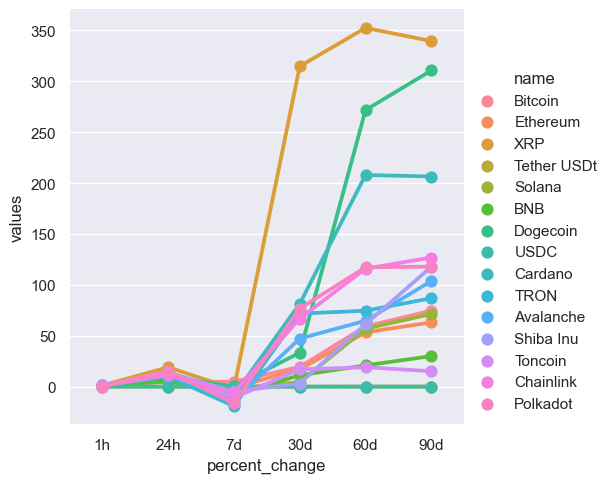

In [78]:
sns.catplot(x='percent_change', y='values', hue='name', data=df8, kind='point')

In [79]:
df10 = df[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,100439.71083,2024-12-11 22:57:54.801201
0,Bitcoin,100439.71083,2024-12-11 22:58:04.610224
0,Bitcoin,100436.30050,2024-12-11 22:59:06.061237
0,Bitcoin,100418.46332,2024-12-11 23:00:07.812442
0,Bitcoin,100446.09032,2024-12-11 23:01:09.089626


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

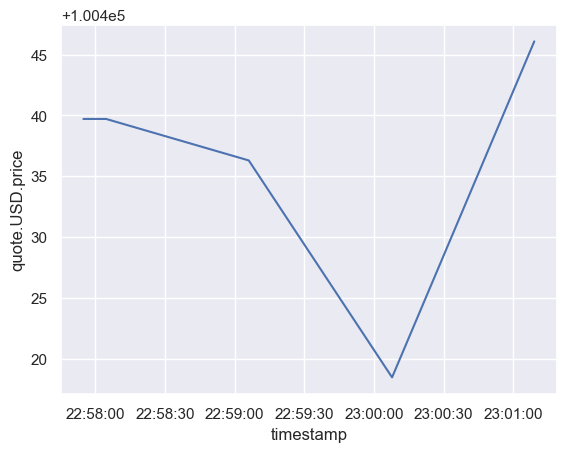

In [80]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)